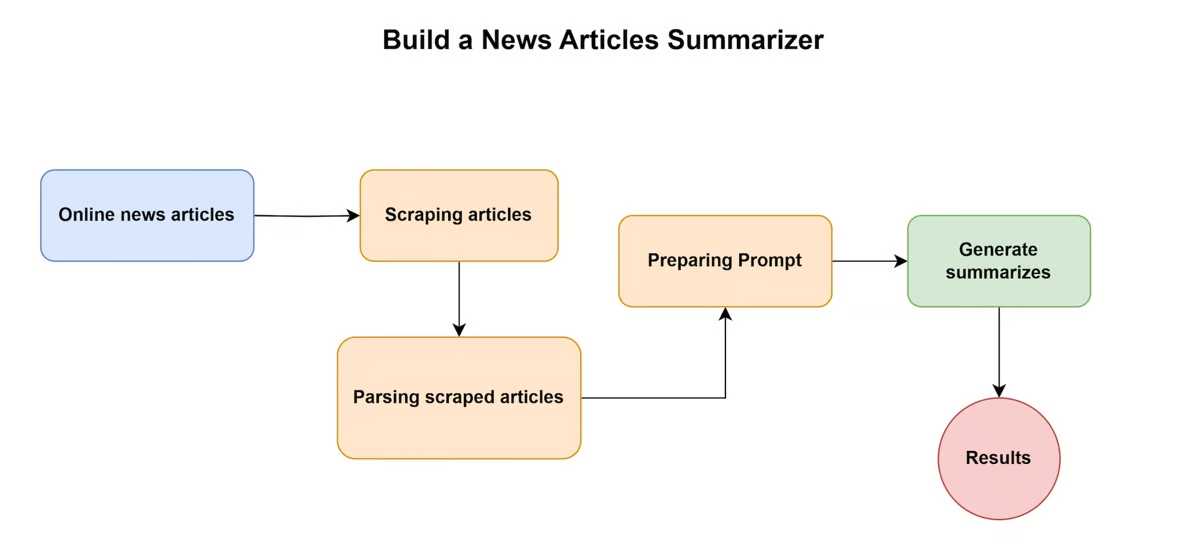

And here are the steps described in more detail:

**Install required libraries**: To get started, ensure you have the necessary libraries installed: requests, newspaper3k, and langchain.
**Scrape articles**: Use the requests library to scrape the content of the target news articles from their respective URLs.
**Extract titles and text**: Employ the newspaper library to parse the scraped HTML and extract the titles and text of the articles.
**Preprocess the text**: Clean and preprocess the extracted texts to make them suitable for input to ChatGPT.
**Generate summaries**: Utilize ChatGPT to summarize the extracted articles' text concisely.
**Output the results**: Present the summaries along with the original titles, allowing users to grasp the main points of each article quickly.

In [ ]:
!pip install requests newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=29e9c3cd7b6f658003ee94bb4ce1dca6796bc4c450535d4aeaa1967967bdb1f9
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=327e9b32eb29dbf7006aeabf39c0448a04089db9b40ac2a0cdbd16deead6523f
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [ ]:
!pip install langchain==0.0.208 deeplake openai tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.1/212.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 

In [ ]:
!pip install -q newspaper3k python-dotenv

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ''

In [ ]:
import requests
from newspaper import Article

headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36','Accept-Language':'en-US, en;q=0.5'
}

article_url = "https://www.artificialintelligence-news.com/2022/01/25/meta-claims-new-ai-supercomputer-will-set-records/"

session = requests.Session()

try:
    response = session.get(article_url, headers=headers, timeout=10)

    if response.status_code == 200:
        article = Article(article_url)
        article.download()
        article.parse()

        print(f"Title: {article.title}")
        print(f"Text: {article.text}")

    else:
        print(f"Failed to fetch article at {article_url}")
except Exception as e:
    print(f"Error occurred while fetching article at {article_url}: {e}")

Title: Meta claims its new AI supercomputer will set records
Text: Ryan is a senior editor at TechForge Media with over a decade of experience covering the latest technology and interviewing leading industry figures. He can often be sighted at tech conferences with a strong coffee in one hand and a laptop in the other. If it's geeky, he’s probably into it. Find him on Twitter (@Gadget_Ry) or Mastodon (@gadgetry@techhub.social)

Meta (formerly Facebook) has unveiled an AI supercomputer that it claims will be the world’s fastest.

The supercomputer is called the AI Research SuperCluster (RSC) and is yet to be fully complete. However, Meta’s researchers have already begun using it for training large natural language processing (NLP) and computer vision models.

RSC is set to be fully built in mid-2022. Meta says that it will be the fastest in the world once complete and the aim is for it to be capable of training models with trillions of parameters.

“We hope RSC will help us build entire

In [ ]:
from langchain.schema import (
    HumanMessage
)

# we get the article data from the scraping part
article_title = article.title
article_text = article.text

# prepare template for prompt
template = """You are a very good assistant that summarizes online articles.

Here's the article you want to summarize.

==================
Title: {article_title}

{article_text}
==================

Write a summary of the previous article.
"""

prompt = template.format(article_title=article.title, article_text=article.text)

messages = [HumanMessage(content=prompt)]

In [ ]:
!pip install -qU \
    langchain==0.0.292 \
    openai==0.28.0 \
    datasets==2.10.1 \
    pinecone-client==2.2.4 \
    tiktoken==0.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 

In [ ]:
from langchain.chat_models import ChatOpenAI

# load the model
chat = ChatOpenAI(openai_api_key = os.environ['OPENAI_API_KEY'],model="gpt-4")

In [ ]:
summary = chat(messages)
print(summary.content)

Meta, formerly known as Facebook, has announced its new AI supercomputer named the AI Research SuperCluster (RSC). Although not yet fully built, the RSC is already being utilized by Meta's researchers for training large natural language processing and computer vision models. The supercomputer is expected to be completed by mid-2022 and is anticipated to be the fastest in the world, capable of training models with trillions of parameters. Meta expects RSC to be 20x faster than its current V100-based clusters and 3x faster at training large-scale NLP workflows. The introduction of RSC will also allow Meta to use real-world data from its production systems for training, a first for the company.

